In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Scenario 1

In [4]:
FairCoin = Die(['H','T'])
FairGame = Game([FairCoin, FairCoin, FairCoin])
FairGame.play_the_game(1000)
FairAnalyzer = Analyzer(FairGame)
FairJackpots = FairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
6,T,T,T
14,T,T,T
16,H,H,H
22,H,H,H
23,H,H,H
...,...,...,...
987,T,T,T
988,H,H,H
993,H,H,H


249


In [5]:
UnfairCoin1 = Die(['H','T'])
UnfairCoin1.change_weight("H",5)
UnfairGame = Game([FairCoin, FairCoin, UnfairCoin1])
UnfairGame.play_the_game(1000)
UnfairAnalyzer = Analyzer(UnfairGame)
UnfairJackpots = UnfairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
2,H,H,H
8,H,H,H
16,H,H,H
18,H,H,H
27,H,H,H
...,...,...,...
985,H,H,H
990,H,H,H
991,T,T,T


256


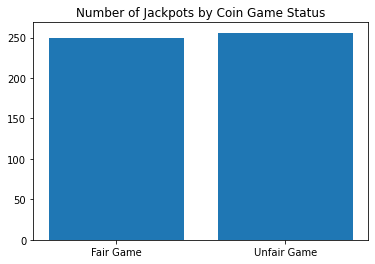

In [6]:
name_of_game = ['Fair Game', 'Unfair Game']
game_result = [FairAnalyzer.number_of_jackpots, UnfairAnalyzer.number_of_jackpots]
game_result
plt.bar(name_of_game,game_result)
plt.title('Number of Jackpots by Coin Game Status')
plt.show()

## Scenario 2

In [24]:
FairDie = Die([1,2,3,4,5,6])
UnfairDie1 = Die([1,2,3,4,5,6])
UnfairDie2 = Die([1,2,3,4,5,6])
UnfairDie1.change_weight(6,5)
UnfairDie2.change_weight(1,5)

In [41]:
FairDieSet = ([FairDie, FairDie, FairDie, FairDie, FairDie])
FairDiceGame = Game(FairDieSet)
FairDiceGame.play_the_game(10000)
FairDiceAnalyzer = Analyzer(FairDiceGame)
FairDiceJackpots = FairDiceAnalyzer.jackpot()
FairDiceAnalyzer.combos()
Top10Fair = FairDiceAnalyzer.combinations.head(10)
Top10Fair

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1156,6,6,6,6,6
1249,5,5,5,5,5
4234,2,2,2,2,2
5621,2,2,2,2,2
6062,3,3,3,3,3
6527,5,5,5,5,5
7752,1,1,1,1,1
7868,4,4,4,4,4
8714,6,6,6,6,6


10


Number of Occurences
Die 1 Die 2 Die 3 Die 4 Die 5                      
6     1     3     2     2                         8
3     1     5     6     4                         6
4     6     5     3     2                         6
2     4     2     3     4                         6
1     3     1     2     6                         6
5     4     5     3     1                         6
4     6     4     4     6                         6
5     2     5     1     2                         6
      6     4     1     6                         6
2     1     3     6     6                         6

In [42]:
UnfairDieSet = ([UnfairDie1, UnfairDie1, UnfairDie2, FairDie, FairDie])
UnfairDiceGame = Game(UnfairDieSet)
UnfairDiceGame.play_the_game(10000)
UnfairDiceAnalyzer = Analyzer(UnfairDiceGame)
UnfairDiceJackpots = UnfairDiceAnalyzer.jackpot()
UnfairDiceAnalyzer.combos()
Top10Unfair = UnfairDiceAnalyzer.combinations.head(10)
Top10Unfair

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
424,6,6,6,6,6
1103,1,1,1,1,1
2307,6,6,6,6,6
2633,6,6,6,6,6
3138,1,1,1,1,1
3892,6,6,6,6,6
7515,6,6,6,6,6
9989,1,1,1,1,1


8


Number of Occurences
Die 1 Die 2 Die 3 Die 4 Die 5                      
6     6     1     1     5                        50
                  2     1                        49
                  6     1                        44
                  5     6                        42
                  2     4                        41
                  4     6                        41
                  3     5                        38
                        1                        38
                  5     3                        38
                  1     2                        38

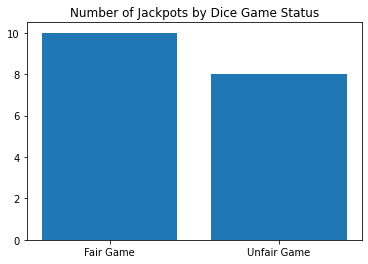

In [43]:
name_of_dice_game = ['Fair Game', 'Unfair Game']
dice_game_result = [FairDiceAnalyzer.number_of_jackpots, UnfairDiceAnalyzer.number_of_jackpots]
plt.bar(name_of_dice_game,dice_game_result)
plt.title('Number of Jackpots by Dice Game Status')
plt.show()

In [40]:
# Need to get ability to make graphs for Part 5 of Scenario 2

In [58]:
pd.set_option('display.max_rows', 500)

## Scenario 3

In [59]:
import string
Alphabet_string = string.ascii_lowercase[:26]
Alphabet_list = [i for i in Alphabet_string]
alphabet_die = Die([i for i in Alphabet_string])
weights_df = pd.DataFrame({"Letter": Alphabet_list, "Weighted": [8.4966,2.072,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,.2902,1.7779,0.2722]})
Weights = weights_df['Weighted']
alphabet_die.weightslist = [Weights[i] for i in range(len(alphabet_die.weightslist))]
Alphabets_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
Alphabets_game.play_the_game(1000)

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1,o,u,e,l,t
2,c,n,p,m,s
3,h,o,d,y,n
4,c,h,d,e,w
5,m,t,y,r,c
...,...,...,...,...,...
996,i,p,o,a,e
997,c,d,g,h,a
998,e,a,i,n,a


In the interest of time, I looked through just 100 rows, and found 2 combinations that could be considered actual English words. A rate of 2% sounds about right.